<a href="https://colab.research.google.com/github/Sayan0361/EDA/blob/main/International_Runs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -q keras

In [ ]:
import keras

# ***EXPLORATORY DATA ANALYSIS OF MOST INTERNATIONAL RUNS***

***(MINIMUM 10,000 INTERNATIONAL RUNS)***

***PS: THE DATA IS OUTDATED***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

runs=pd.read_csv('/content/drive/MyDrive/most_runs_in_cricket.csv')
runs

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56


In [ ]:
runs.head(10)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (INDIA),1989-2013,664,782,74,34357,248,48.52,50817+,67.58,100,164,34,4076,264
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,594,666,67,28016,319,46.77,42086,66.56,63,153,28,3015,159
2,2,RT Ponting (AUS/ICC),1995-2012,560,668,70,27483,257,45.95,40130,68.48,71,146,39,2781,246
3,3,DPMD Jayawardene (Asia/SL),1997-2015,652,725,62,25957,374,39.15,40100,64.73,54,136,47,2679,170
4,4,JH Kallis (Afr/ICC/SA),1995-2014,519,617,97,25534,224,49.10,45346,56.30,62,149,33,2455,254
5,5,R Dravid (Asia/ICC/INDIA),1996-2012,509,605,72,24208,270,45.41,46564,51.98,48,146,21,2604,66
6,6,V Kohli (INDIA),2008-2022,473,527,77,24130,254,53.62,30483,79.15,71,125,33,2400,258
7,7,BC Lara (ICC/WI),1990-2007,430,521,38,22358,400,46.28,32839,68.08,53,111,33,2601,221
8,8,ST Jayasuriya (Asia/SL),1989-2011,586,651,35,21032,340,34.14,25910,81.17,42,103,53,2486,352
9,9,S Chanderpaul (WI),1994-2015,454,553,94,20988,203,45.72,40150,52.27,41,125,21,2041,126


In [ ]:
runs.tail(10)

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
78,78,SR Watson (AUS),2002-2016,307,334,36,10950,185,36.74,14465,75.69,14,67,21,1168,245
79,79,EJG Morgan (ENG/IRE),2006-2022,379,361,56,10859,148,35.60,11530,94.18,16,64,25,917,346
80,80,S Dhawan (INDIA),2010-2022,263,282,14,10746,190,40.09,12119,88.67,24,54,11,1331,140
81,81,MV Boucher (Afr/ICC/SA),1997-2012,467,448,87,10469,147,29.00,16808,62.28,6,61,33,1034,105
82,82,JM Bairstow (ENG),2011-2022,250,305,31,10453,167,38.14,13990,74.71,23,46,28,1176,192
83,83,DB Vengsarkar (INDIA),1976-1992,245,305,41,10376,166,39.30,15989+,50.04,18,58,22,737,41
84,84,ME Trescothick (ENG),2000-2006,202,268,16,10326,219,40.97,15903,64.93,26,52,25,1382,84
85,85,G Gambhir (INDIA),2003-2016,242,283,18,10324,206,38.95,14994,68.85,20,63,20,1188,37
86,86,MD Crowe (NZ),1982-1995,220,271,29,10148,299,41.93,18666,54.36,21,52,12,1037,56
87,87,GW Flower (ZIM),1992-2010,288,337,24,10028,201,32.03,19736,50.81,12,55,34,906,53


In [ ]:
runs.describe()

,Unnamed: 0,Mat,Inns,NO,Runs,HS,Ave,SR,100,50,0,4s,6s
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,43.500000,365.431818,421.329545,46.943182,15301.284091,241.784091,40.816364,66.841818,31.034091,83.579545,25.284091,1593.363636,158.681818
std,25.547342,104.135830,107.002495,24.002566,4665.091415,57.521100,5.230841,12.652238,15.438010,24.978944,8.992908,547.409263,113.449928
min,0.000000,202.000000,252.000000,12.000000,10028.000000,135.000000,23.920000,45.900000,6.000000,46.000000,9.000000,737.000000,9.000000
25%,21.750000,285.750000,337.000000,30.750000,11728.500000,199.750000,37.660000,56.967500,20.000000,66.750000,19.750000,1242.000000,77.750000
50%,43.500000,360.500000,410.000000,41.000000,13986.000000,232.500000,40.545000,65.110000,28.500000,77.500000,23.000000,1470.000000,132.500000
75%,65.250000,425.250000,467.250000,62.250000,17274.500000,278.500000,44.870000,74.710000,38.250000,93.500000,33.000000,1778.250000,215.250000
max,87.000000,664.000000,782.000000,142.000000,34357.000000,400.000000,53.620000,114.140000,100.000000,164.000000,53.000000,4076.000000,553.000000


In [ ]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   Player      88 non-null     object 
 2   Span        88 non-null     object 
 3   Mat         88 non-null     int64  
 4   Inns        88 non-null     int64  
 5   NO          88 non-null     int64  
 6   Runs        88 non-null     int64  
 7   HS          88 non-null     int64  
 8   Ave         88 non-null     float64
 9   BF          88 non-null     object 
 10  SR          88 non-null     float64
 11  100         88 non-null     int64  
 12  50          88 non-null     int64  
 13  0           88 non-null     int64  
 14  4s          88 non-null     int64  
 15  6s          88 non-null     int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 11.1+ KB


# ***MOST MATCHES IN INTERNATIONAL CRICKET***

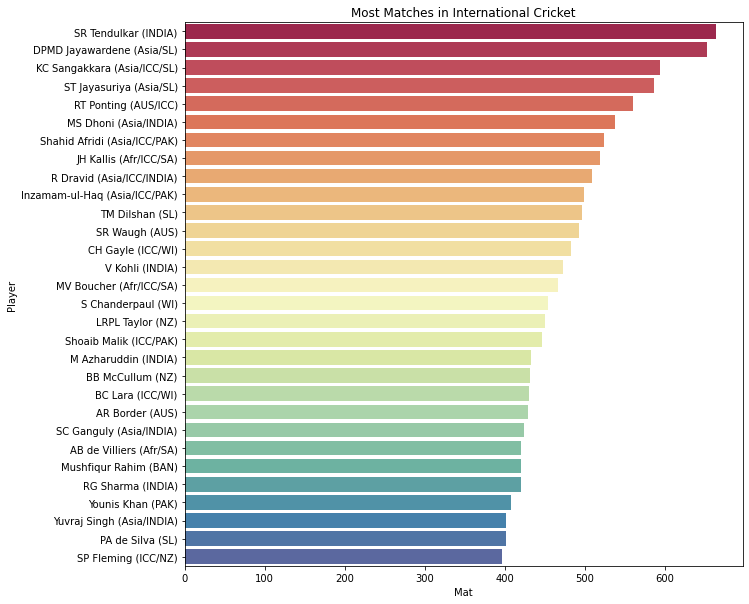

In [ ]:
most_matches=runs[['Player','Mat']].sort_values(by='Mat',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='Mat',palette="Spectral",data=most_matches.head(30))
graph.set_title("Most Matches in International Cricket")
plt.show()

# ***MOST NUMBER OF NOT OUTS IN INTERNATIONAL CRICKET***

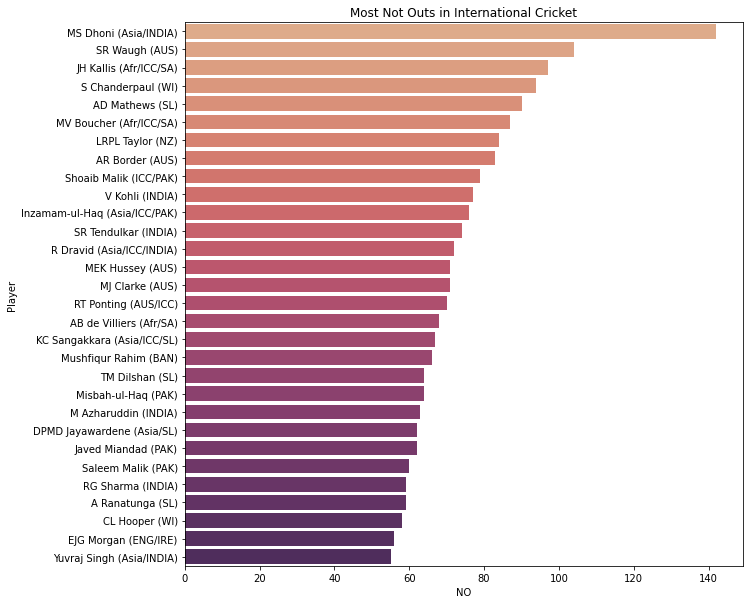

In [ ]:
most_not_outs=runs[['Player','NO']].sort_values(by='NO',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='NO',palette="flare",data=most_not_outs.head(30))
graph.set_title("Most Not Outs in International Cricket")
plt.show()

# ***MOST RUNS IN INTERNATIONAL CRICKET***

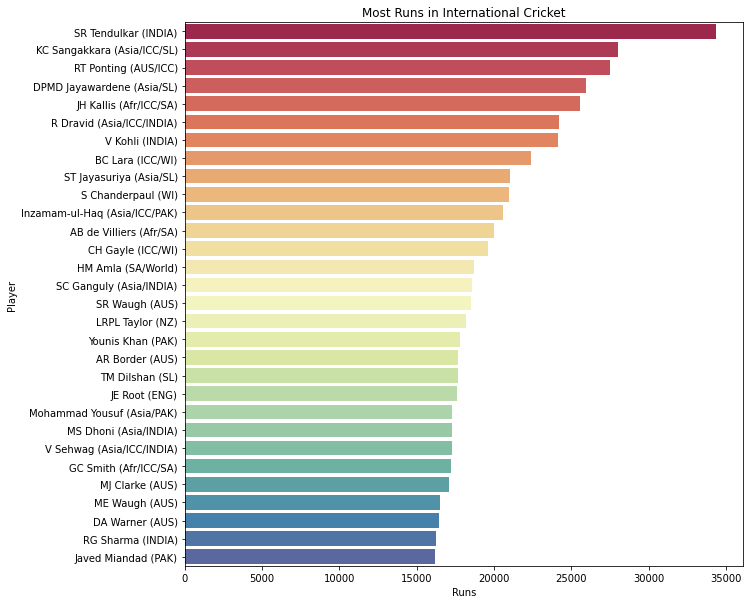

In [ ]:
most_runs=runs[['Player','Runs']].sort_values(by='Runs',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='Runs',palette="Spectral",data=most_runs.head(30))
graph.set_title("Most Runs in International Cricket")
plt.show()

# ***HIGHEST SCORE IN INTERNATIONAL CRICKET***

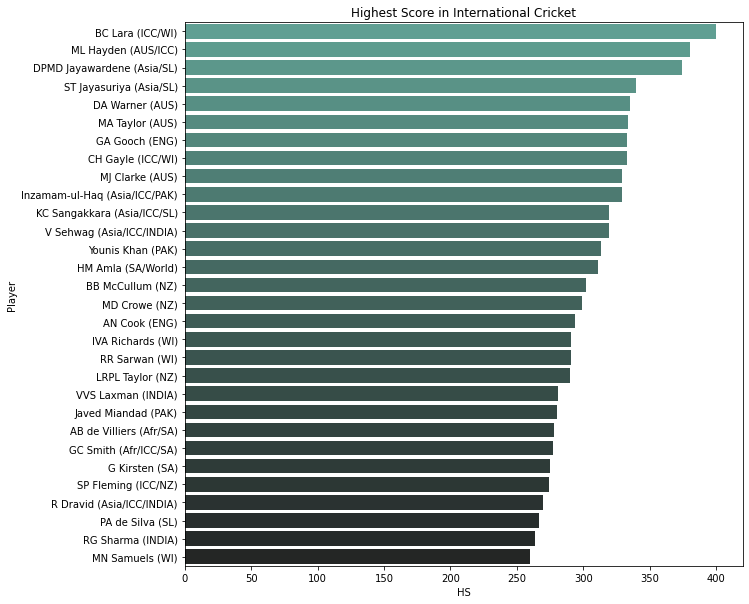

In [ ]:
highest_score=runs[['Player','HS']].sort_values(by='HS',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='HS',palette="dark:#5A9_r",data=highest_score.head(30))
graph.set_title("Highest Score in International Cricket")
plt.show()

# ***HIGHEST AVERAGE IN INTERNATIONAL  CRICKET***

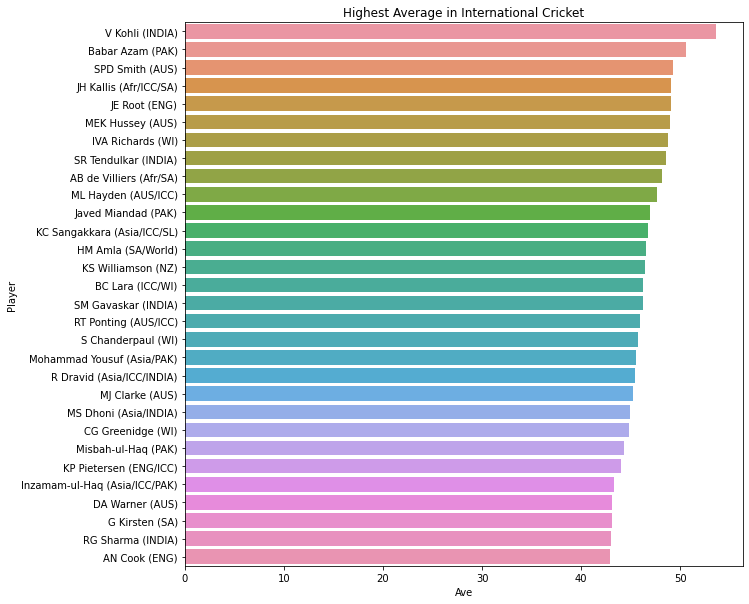

In [ ]:
highest_average=runs[['Player','Ave']].sort_values(by='Ave',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='Ave',data=highest_average.head(30))
graph.set_title("Highest Average in International Cricket")
plt.show()

# ***HIGHEST STRIKE RATE IN INTERNATIONAL CRICKET***

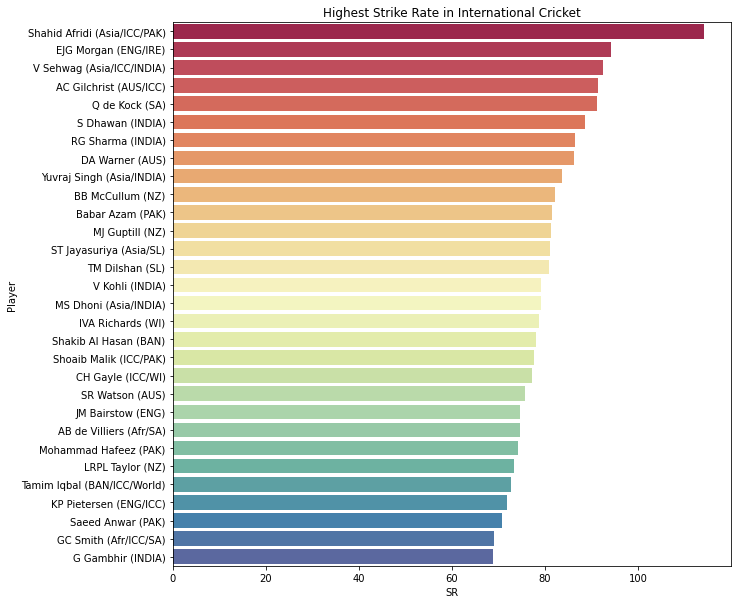

In [ ]:
highest_sr=runs[['Player','SR']].sort_values(by='SR',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='SR',palette="Spectral",data=highest_sr.head(30))
graph.set_title("Highest Strike Rate in International Cricket")
plt.show()

# ***MOST HUNDREDS IN INTERNATIONAL CRICKERT***

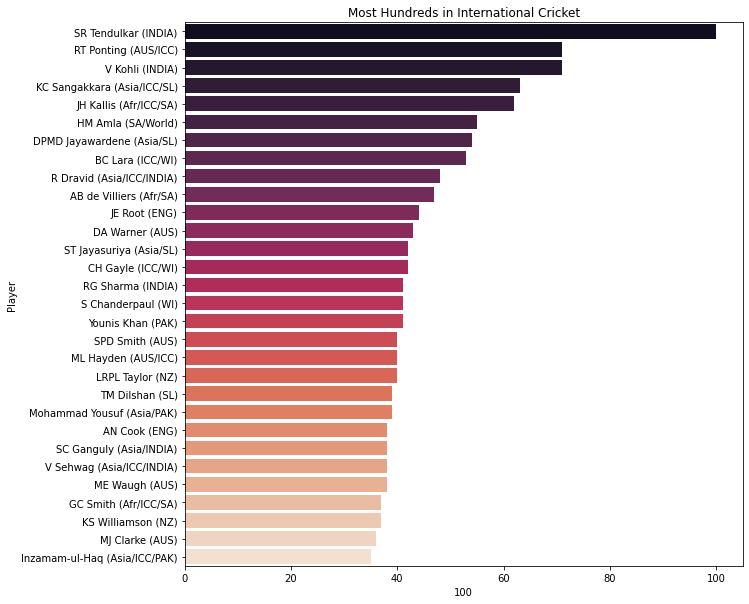

In [ ]:
most_hundreds=runs[['Player','100']].sort_values(by='100',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='100',palette="rocket",data=most_hundreds.head(30))
graph.set_title("Most Hundreds in International Cricket")
plt.show()

# ***MOST FIFTIES IN INTERNATIONAL CRICKET***

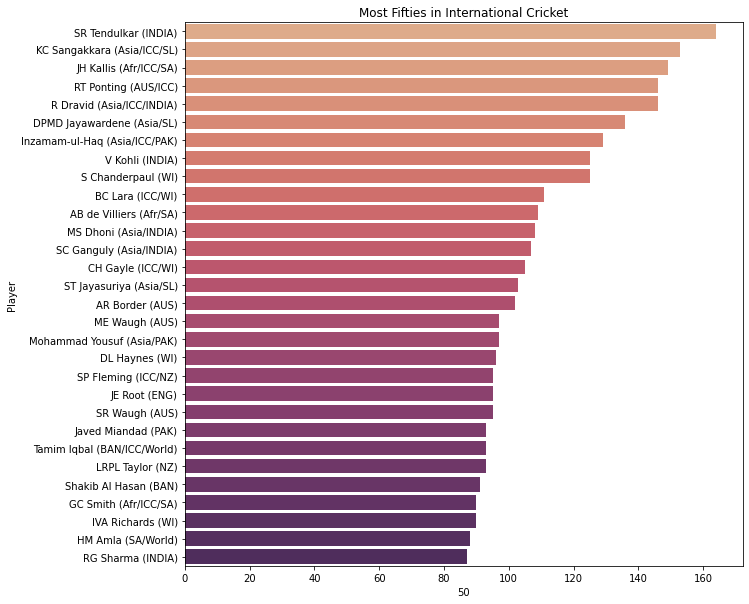

In [ ]:
most_fifties=runs[['Player','50']].sort_values(by='50',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='50',palette="flare",data=most_fifties.head(30))
graph.set_title("Most Fifties in International Cricket")
plt.show()

# ***MOST DUCKS IN INTERNATIONAL CRICKET***

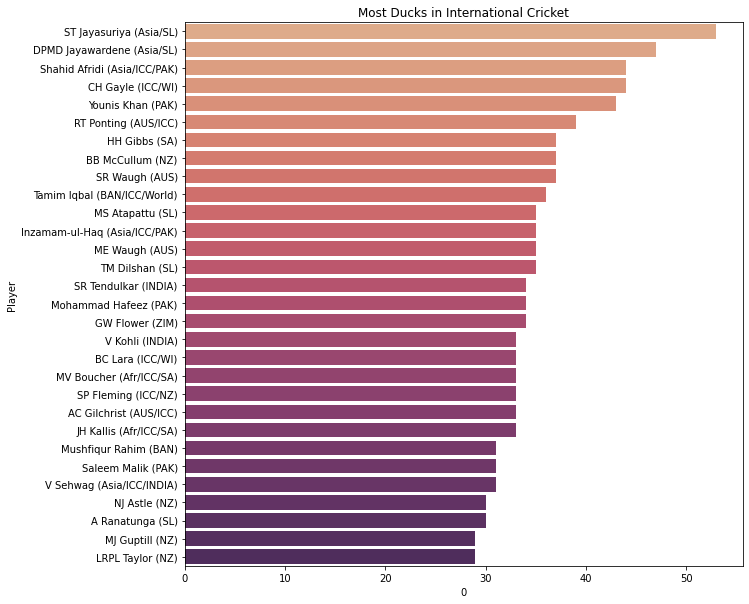

In [ ]:
most_ducks=runs[['Player','0']].sort_values(by='0',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='0',palette="flare",data=most_ducks.head(30))
graph.set_title("Most Ducks in International Cricket")
plt.show()

# ***MOST FOURS IN INTERNATIONAL CRICKET***

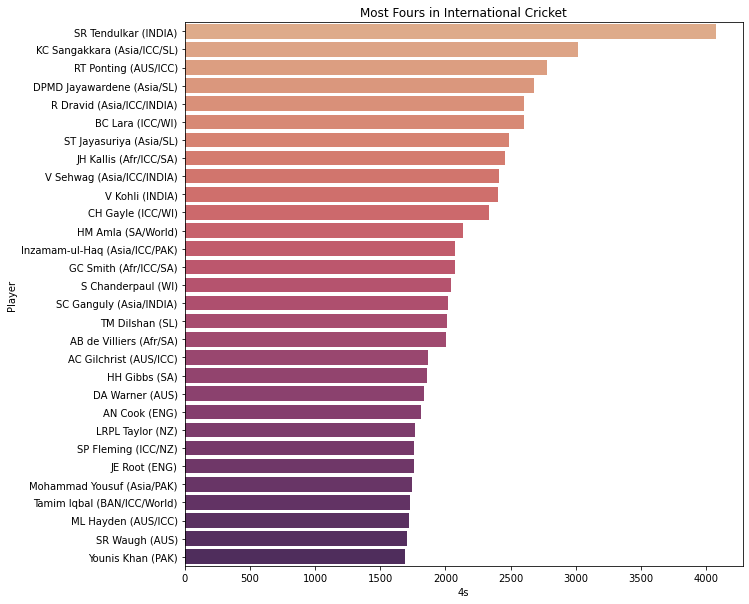

In [ ]:
most_fours=runs[['Player','4s']].sort_values(by='4s',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='4s',palette="flare",data=most_fours.head(30))
graph.set_title("Most Fours in International Cricket")
plt.show()

# ***MOST SIXES IN INTERNATIONAL CRICKET***

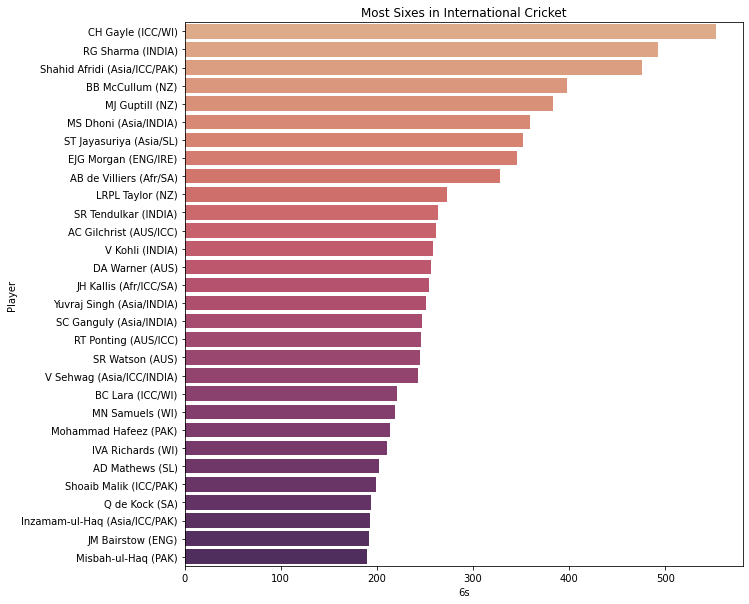

In [ ]:
most_sixes=runs[['Player','6s']].sort_values(by='6s',ascending=False)
plt.figure(figsize=(10,10))
graph=sns.barplot(y='Player',x='6s',palette="flare",data=most_sixes.head(30))
graph.set_title("Most Sixes in International Cricket")
plt.show()

# ***A BRIEF DATA VISUALISATION OF STATS***

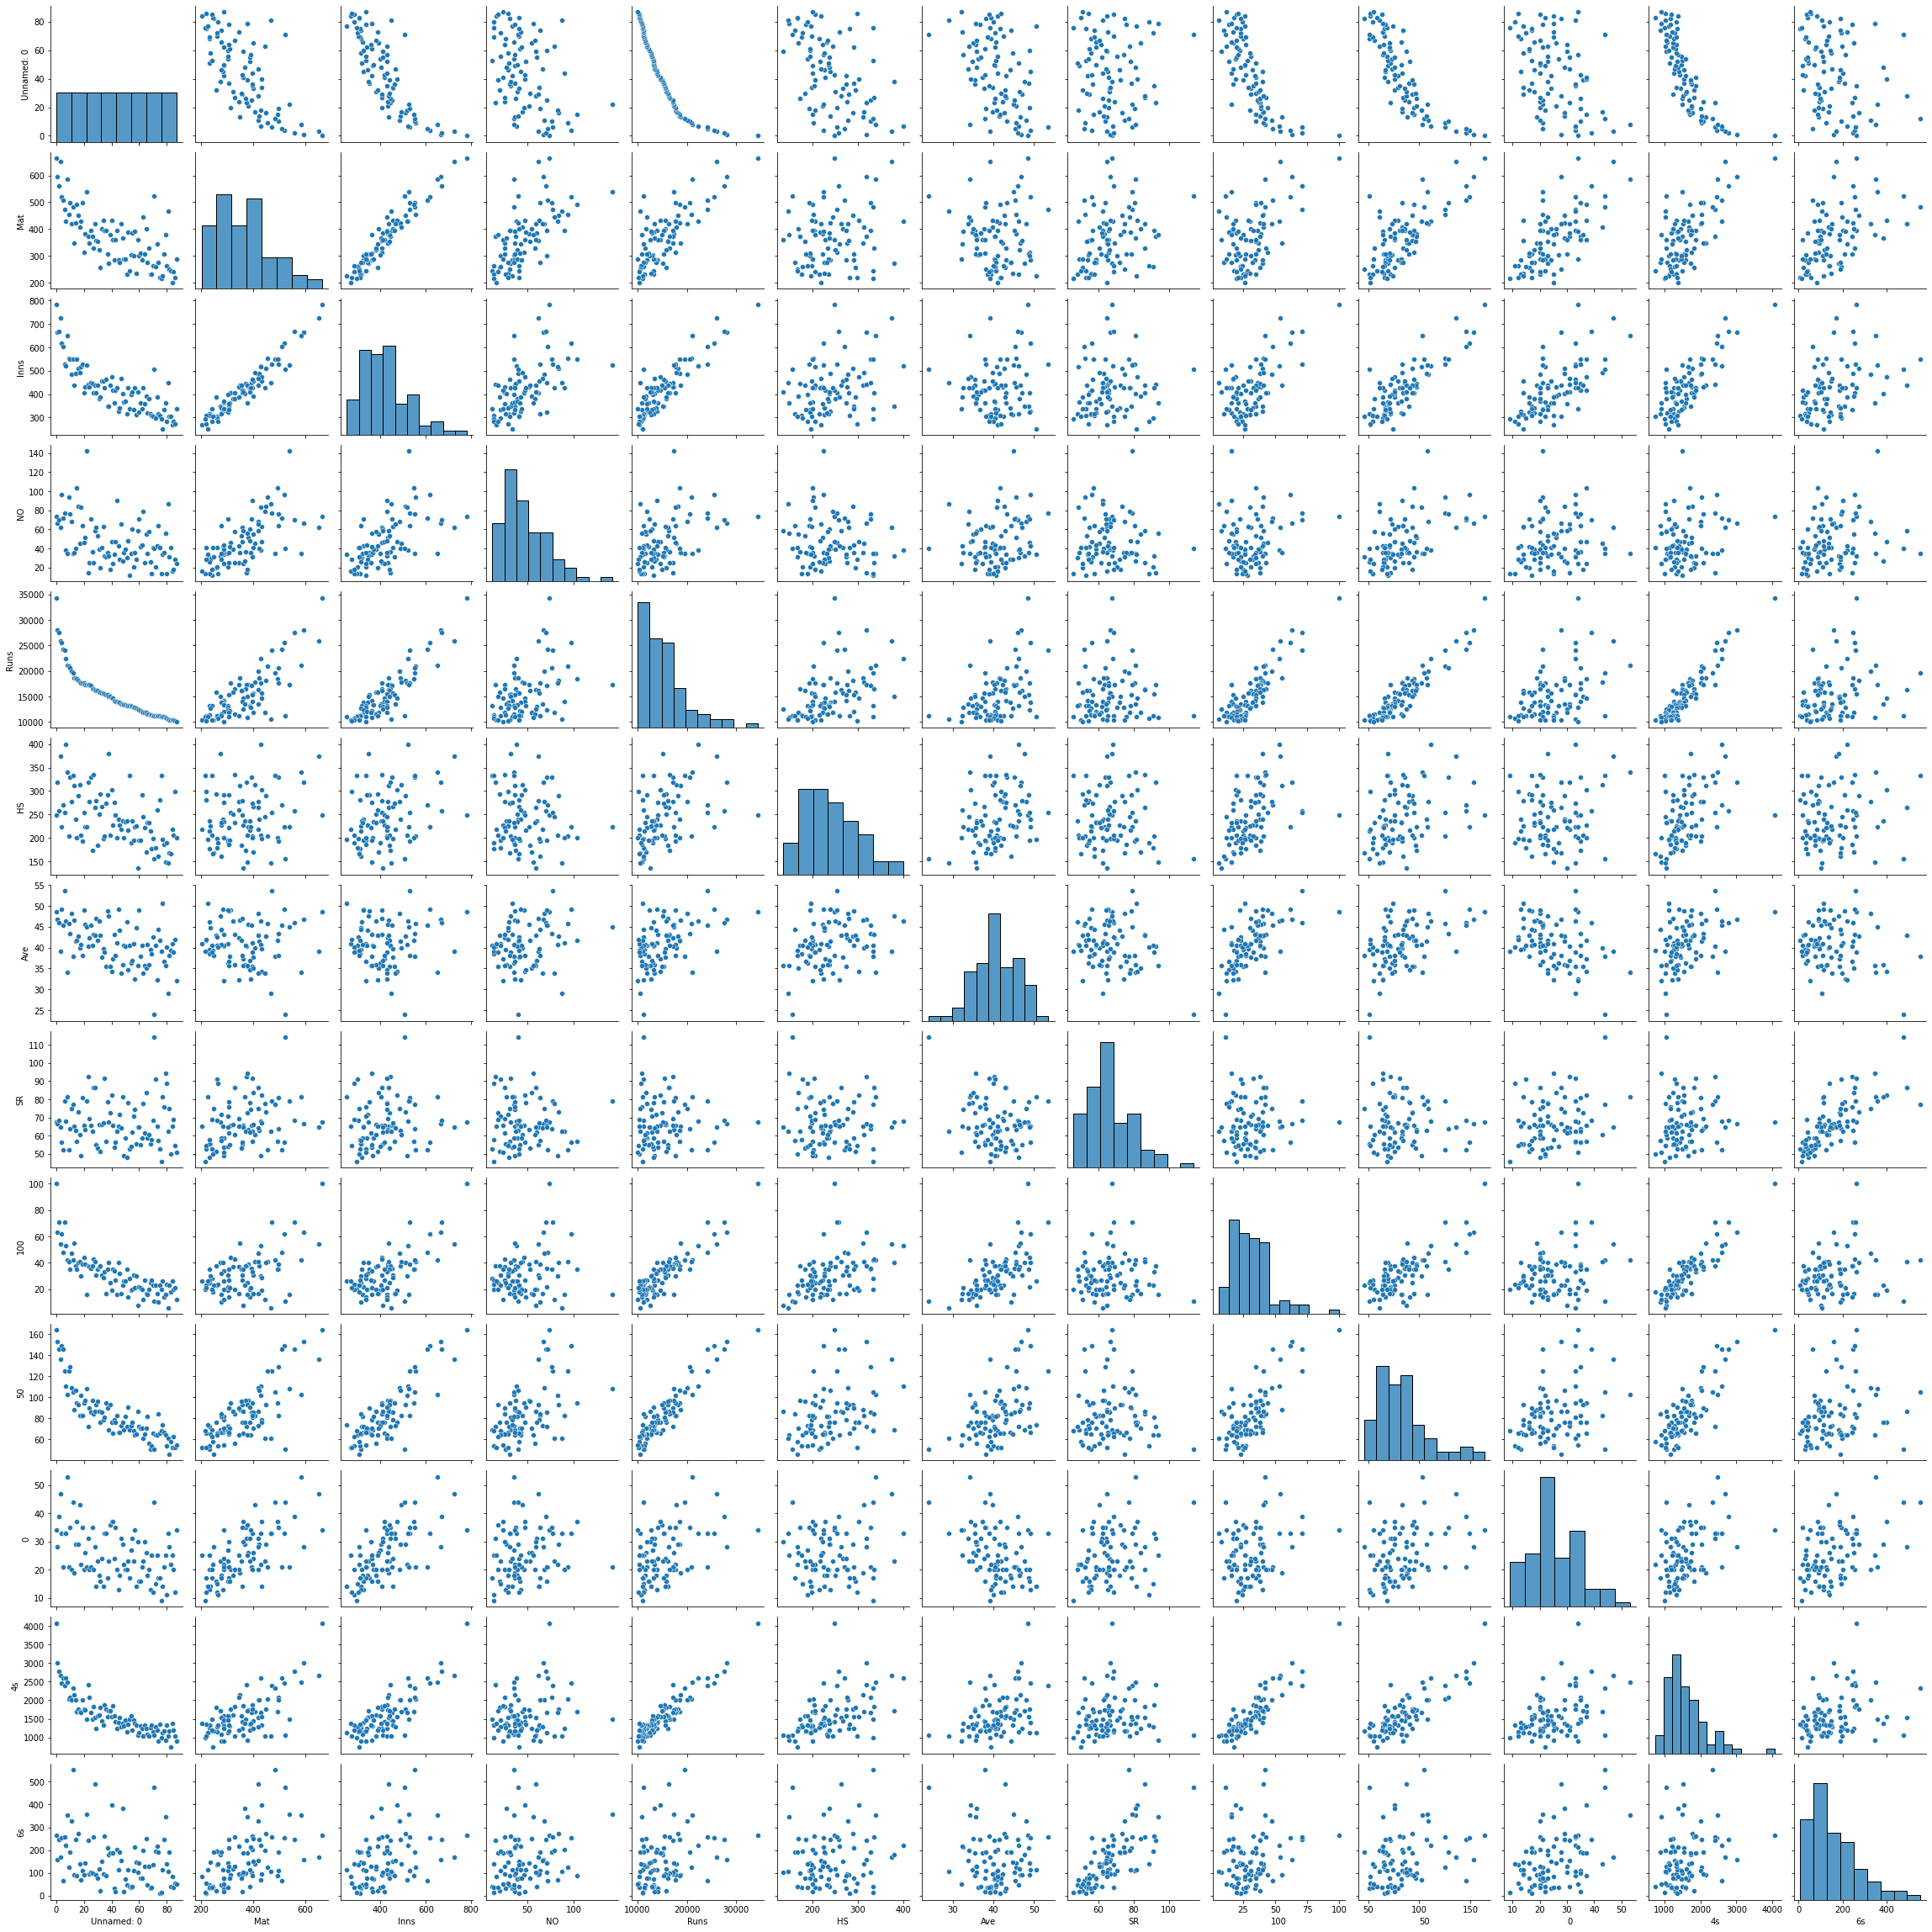

In [ ]:
sns.pairplot(runs)

***THANK YOU***




